In [1]:
import os
import json
import time
import math
import matplotlib.pyplot as plt
from core.data_processor import DataLoader
from core.model import Model

Using TensorFlow backend.


In [3]:
def plot_results(predicted_data, true_data):
    fig = plt.figure(facecolor='white', figsize=(16, 16))
    ax = fig.add_subplot(111)
    ax.plot(true_data, label='True Data')
    plt.plot(predicted_data, label='Prediction')
    plt.legend()
    plt.show()

In [4]:
def plot_results_multiple(predicted_data, true_data, prediction_len):
    fig = plt.figure(facecolor='white', figsize=(16, 16))
    ax = fig.add_subplot(111)
    ax.plot(true_data, label='True Data')
    #Pad the list of predictions to shift it in the graph to it's correct start
    for i, data in enumerate(predicted_data):
        padding = [None for p in range(i * prediction_len)]
        plt.plot(padding + data, label='Prediction')
        plt.legend()
    plt.show()


In [5]:
configs = json.load(open('config.json', 'r'))

data = DataLoader(
    os.path.join('data', configs['data']['filename']),
    configs['data']['train_test_split'],
    configs['data']['columns']
)

model = Model()
model.build_model(configs)
x, y = data.get_train_data(
    seq_len = configs['data']['sequence_length'],
    normalise = configs['data']['normalise']
)


# in-memory training
# model.train(
#     x,
#     y,
#     epochs = configs['training']['epochs'],
#     batch_size = configs['training']['batch_size']
# )

# out-of memory generative training
steps_per_epoch = math.ceil((data.len_train - configs['data']['sequence_length']) / configs['training']['batch_size'])
model.train_generator(
    data_gen = data.generate_train_batch(
        seq_len = configs['data']['sequence_length'],
        batch_size = configs['training']['batch_size'],
        normalise = configs['data']['normalise']
    ),
    epochs = configs['training']['epochs'],
    batch_size = configs['training']['batch_size'],
    steps_per_epoch = steps_per_epoch
 )


[Model] Model Compiled
Time taken: 0:00:00.851718
[Model] Training Started
[Model] 1 epochs, 32 batch size, 124 batches per epoch
Epoch 1/1
124/124 [==============================] - 24s 194ms/step - loss: 0.0020
[Model] Training Completed. Model saved as saved_models/19092018-163549-e1.h5
Time taken: 0:00:25.843696


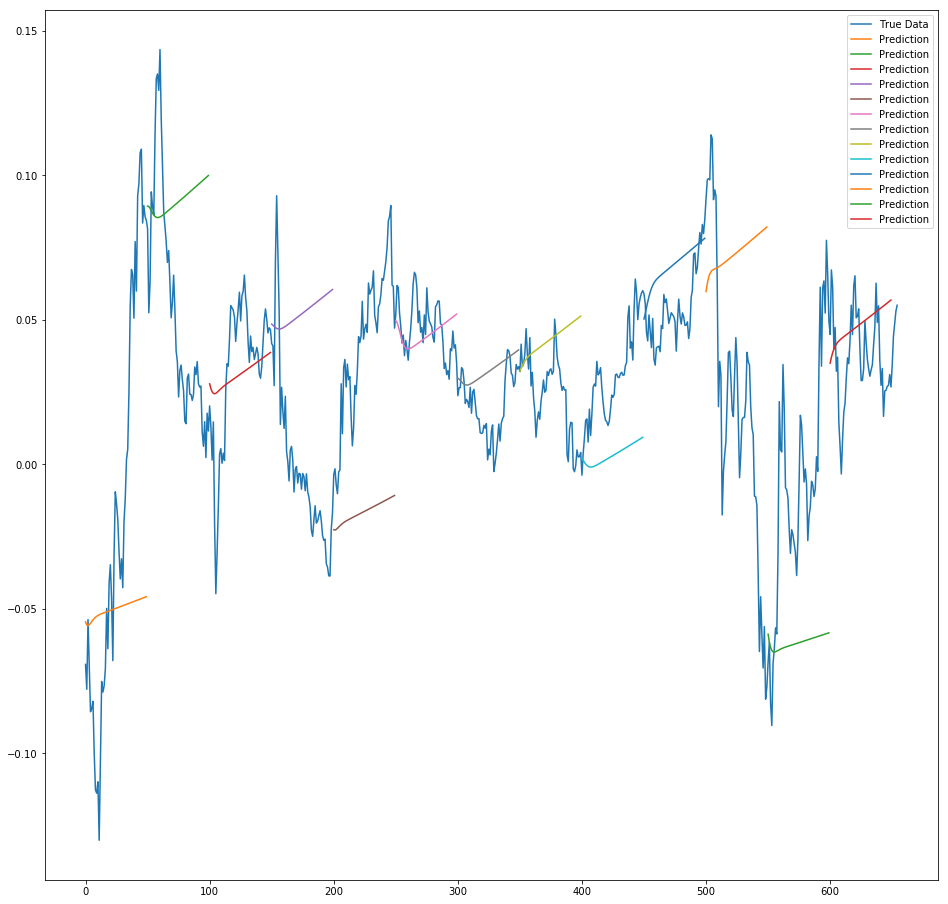

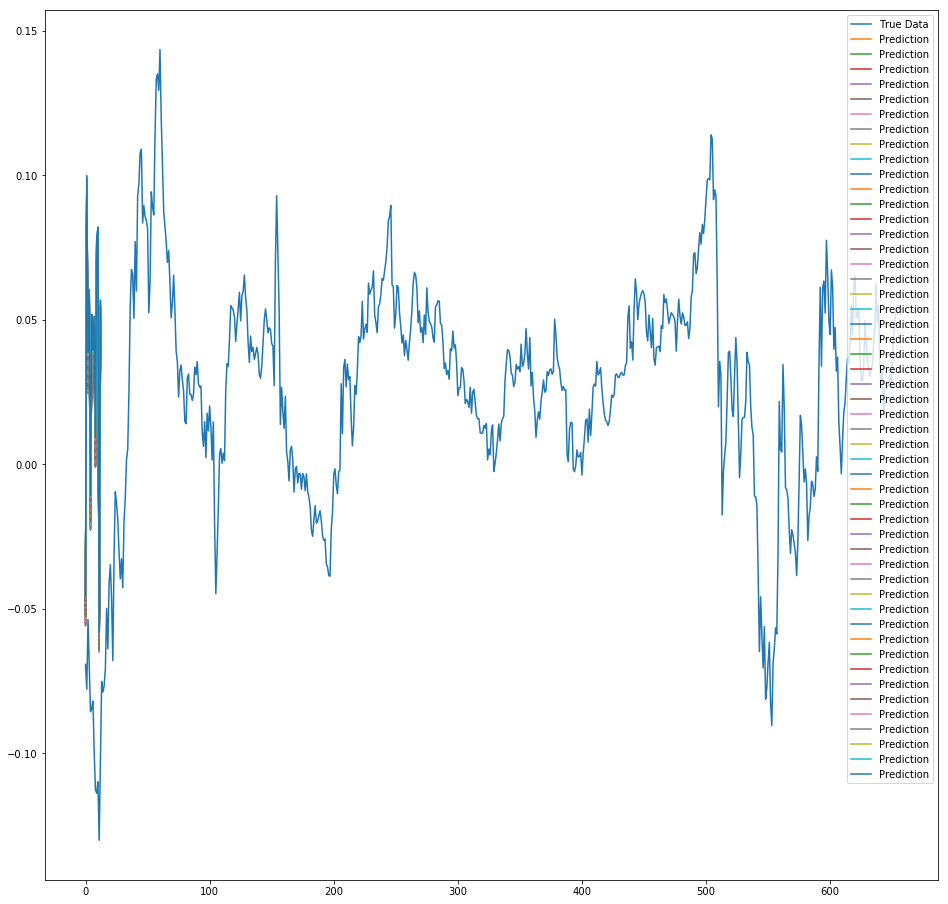

In [32]:

x_test, y_test = data.get_test_data(
    seq_len = configs['data']['sequence_length'],
    normalise = configs['data']['normalise']
)

predictions = model.predict_sequences_multiple(x_test, configs['data']['sequence_length'], configs['data']['sequence_length'])

plot_results_multiple(predictions, y_test, configs['data']['sequence_length'])
plot_results(predictions, y_test)


## Gaussian Bias method of Stock prediction up or down

In [72]:
k = y.copy()
k1 = y_test.copy()

In [73]:
k[k<0] = 0
k[k>0] = 1
y_n = k

k1[k1<0] = 0
k1[k1>0] = 1
y_test_n = k1

In [74]:
import numpy as np
x_n = x[:, :, 0]
x_test_n = x_test[:, :, 0]
print(x_n.shape,y_n.shape)

(3942, 49) (3942, 1)


In [83]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
GNB.fit(x_n,y_n)

GaussianNB(priors=None)

In [84]:
y_pred=GNB.predict(x_test_n)

In [85]:
from sklearn import metrics
print ("accuracy - ",metrics.accuracy_score(y_test_n, y_pred))

accuracy -  0.9312977099236641
